In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.DataFrame()

for year in ['2017','2018','2019']:
    df_eredivisie = pd.read_csv('transfers-master/data/'+year+'/dutch_eredivisie.csv')
    df_championship = pd.read_csv('transfers-master/data/'+year+'/english_championship.csv')
    df_premier_league = pd.read_csv('transfers-master/data/'+year+'/english_premier_league.csv')
    df_ligue_un = pd.read_csv('transfers-master/data/'+year+'/french_ligue_1.csv')
    df_bundesliga = pd.read_csv('transfers-master/data/'+year+'/german_bundesliga_1.csv')
    df_serie_a = pd.read_csv('transfers-master/data/'+year+'/italian_serie_a.csv')
    df_liga_nos = pd.read_csv('transfers-master/data/'+year+'/portugese_liga_nos.csv')
    df_premier_liga = pd.read_csv('transfers-master/data/'+year+'/russian_premier_liga.csv')
    df_la_liga = pd.read_csv('transfers-master/data/'+year+'/spanish_primera_division.csv')
    
    df_transfers = pd.concat([df_eredivisie, df_championship, df_premier_league, df_ligue_un, df_bundesliga,
                             df_serie_a, df_liga_nos, df_premier_liga, df_la_liga])
    
    df_transfers_in = df_transfers[df_transfers.transfer_movement == 'in']
    
    df_transfers_in = df_transfers_in[df_transfers_in.fee_cleaned > 0]
    
    df_transfers_in = df_transfers_in[df_transfers_in.fee.apply(lambda x: not x.startswith('Loan fee:'))]
    
    df = pd.concat([df, df_transfers_in])
    
df.reset_index(drop= True)

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,fee_cleaned,league_name,year,season
0,Feyenoord Rotterdam,Steven Berghuis,25,Right Winger,Watford,£5.85m,in,5.85,Eredivisie,2017,2017/2018
1,Feyenoord Rotterdam,Ridgeciano Haps,24,Left-Back,AZ Alkmaar,£5.40m,in,5.40,Eredivisie,2017,2017/2018
2,Feyenoord Rotterdam,Jeremiah St. Juste,20,Centre-Back,Heerenveen,£4.32m,in,4.32,Eredivisie,2017,2017/2018
3,Feyenoord Rotterdam,Sofyan Amrabat,20,Central Midfield,FC Utrecht,£3.60m,in,3.60,Eredivisie,2017,2017/2018
4,Feyenoord Rotterdam,Sam Larsson,24,Left Winger,Heerenveen,£3.60m,in,3.60,Eredivisie,2017,2017/2018
...,...,...,...,...,...,...,...,...,...,...,...
2161,Granada CF,Antoñín,19,Centre-Forward,Málaga CF,£1.35m,in,1.35,Primera Division,2019,2019/2020
2162,RCD Mallorca,Ante Budimir,27,Centre-Forward,Crotone,£1.98m,in,1.98,Primera Division,2019,2019/2020
2163,RCD Mallorca,Yannis Salibur,28,Right Winger,Guingamp,£1.80m,in,1.80,Primera Division,2019,2019/2020
2164,RCD Mallorca,Martin Valjent,23,Centre-Back,Chievo Verona,£1.35m,in,1.35,Primera Division,2019,2019/2020


<AxesSubplot:xlabel='year'>

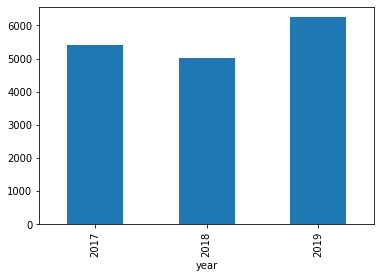

In [30]:
df.groupby('year').fee_cleaned.sum().plot(kind = 'bar')

<AxesSubplot:xlabel='year'>

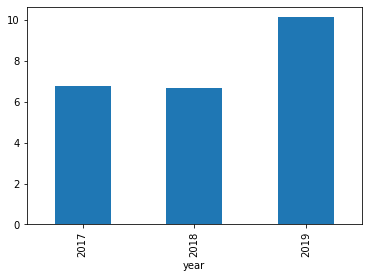

In [31]:
df.groupby('year').fee_cleaned.mean().plot(kind = 'bar')

<AxesSubplot:xlabel='league_name'>

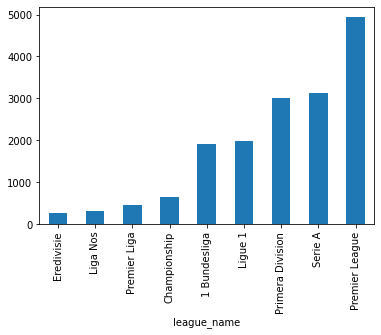

In [33]:
df.groupby('league_name').fee_cleaned.sum().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='league_name'>

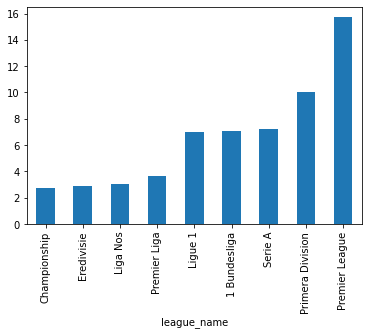

In [34]:
df.groupby('league_name').fee_cleaned.mean().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='age'>

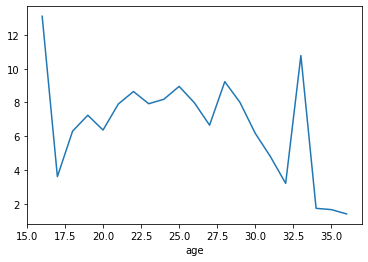

In [35]:
df.groupby('age').fee_cleaned.mean().plot()

<AxesSubplot:xlabel='position'>

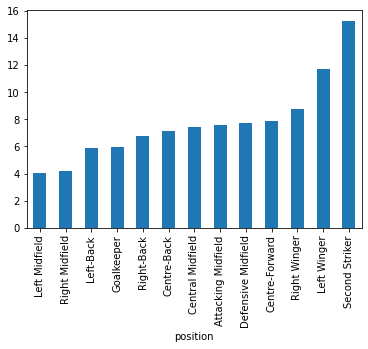

In [36]:
df.groupby('position').fee_cleaned.mean().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='position'>

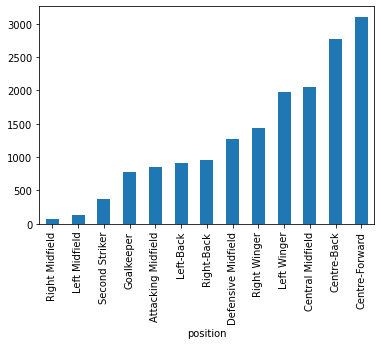

In [37]:
df.groupby('position').fee_cleaned.sum().sort_values().plot(kind = 'bar')